## Exploratory Data Analysis and Feature Engineering of Playstore Data

### Problem Statement 
To find most popular category, largest number of installs, largest size and other interesting facts

1. Data consists of 20 columns and 10841 rows.
2. Demonstrating the data cleaning 
3. Doing EDA on the dataset 
4. Applying Feature Engineering 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
filepath = "https://raw.githubusercontent.com/pbirthal/Projects/main/Project_5_EDA_FE_Playstore/googleplaystore.csv"

In [4]:
df= pd.read_csv(filepath)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Data Cleaning Process

In [8]:
df.isnull().sum()  # checking for missing values 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

This dataset has missing values which needs to be treated

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df['Reviews'].unique() # Lets change the datatype of numerical columns to int 

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
df['Reviews'].astype(int)  # There is one value 3.0M sitting in the data point. We have to treat that before converting 

ValueError: invalid literal for int() with base 10: '3.0M'

Error above is bound to come during cleaning process

In [12]:
df['Reviews'].str.isnumeric().sum() # Our data has 10841 rows , it is showing 10840 numeric values. Lets find that row 

10840

In [13]:
df[~df['Reviews'].str.isnumeric()]  # Here I used "~" which tells not this but all 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


There is only one value and our value is at row no 10472.

In [14]:
df1 = df.copy() # Will perform operations on the copy dataset

In [15]:
##Lets drop this row 
df1 = df1.drop(df1.index[10472])
df1[~df1['Reviews'].str.isnumeric()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [16]:
df1['Reviews']= df1['Reviews'].astype(int)

In [17]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We have a lot of values here , but we need to have it in one standard numerical data points. Hence will convert M to Ks and then Ks to 1000

In [18]:
df1['Size'] = df1['Size'].str.replace('M','000k')
df1['Size'] = df1['Size'].str.replace('k','000')
df1['Size'] = df1['Size'].str.replace('.','')
df1['Size'].unique()

array(['19000000', '14000000', '87000000', '25000000', '28000000',
       '56000000', '29000000', '33000000', '31000000', '12000000',
       '20000000', '21000000', '37000000', '27000000', '55000000',
       '17000000', '39000000', '42000000', '70000000', '23000000',
       '60000000', '61000000', '46000000', '92000000', '52000000',
       '11000000', '24000000', 'Varies with device', '94000000',
       '15000000', '10000000', '26000000', '80000000', '79000000',
       '57000000', '35000000', '54000000', '201000', '36000000',
       '86000000', '16000000', '34000000', '89000000', '38000000',
       '32000000', '18000000', '22000000', '45000000', '98000000',
       '90000000', '67000000', '30000000', '71000000', '74000000',
       '64000000', '82000000', '99000000', '49000000', '95000000',
       '50000000', '59000000', '13000000', '73000000', '68000000',
       '40000000', '72000000', '91000000', '23000', '65000000',
       '75000000', '51000000', '41000000', '48000000', '85000000',
  

In [19]:
df1['Size'].isnull().sum() # There are no null values but we still want to make sure that every datapoint is in standard format

0

In [20]:
df1[~df1['Size'].str.isnumeric()]['Size'].value_counts()  # Here we found that we have one value "Varies with device". We can replace these value with np.nan

Size
Varies with device    1695
Name: count, dtype: int64

In [21]:
df1['Size'] = df1['Size'].replace('Varies with device', np.nan)

In [22]:
df1['Size']= df1['Size'].astype(float)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [24]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [25]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in chars_to_remove:
    for cols in cols_to_clean: 
        df1[cols] = df1[cols].str.replace( item, '')

In [26]:
df1.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [27]:
df1.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [28]:
df1['Installs'] = df1['Installs'].astype(int)
df1['Price'] = df1['Price'].astype(float)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [30]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
df1['Last Updated'] =pd.to_datetime(df1['Last Updated'])
df1['Day']= df1['Last Updated'].dt.day
df1['Month']= df1['Last Updated'].dt.month
df1['Year']= df1['Last Updated'].dt.year
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [32]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [33]:
df1.to_csv('googleplaystore_clean.csv')

### Exploratory Data Analysis 

Lets breakdown the app column and search for any duplicates

In [34]:
df1[df1.duplicated('App')==True].shape ## Obs 1 - looks like we have 1181 rows duplicated. lets drop these

(1181, 16)

In [35]:
df1 = df1.drop_duplicates(subset=['App'], keep='first') #The first record will be kept 
df1.shape

(9659, 16)

In [36]:
df1.dtypes == 'O'

App                True
Category           True
Rating            False
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres             True
Last Updated      False
Current Ver        True
Android Ver        True
Day               False
Month             False
Year              False
dtype: bool

In [37]:
# Lets check how many numerical and categorical features in the dataset
numeric_features = [ftr for ftr in df1.columns if df1[ftr].dtype !='O']  # we did boolean with letter 'o' of the object
categorical_features = [ftr for ftr in df1.columns if df1[ftr].dtype =='O'] 

#print col 
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'We have {len(categorical_features)} categorical features: {categorical_features}')

We have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']



#### Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App



In [38]:
# Check proportions of categorical features

for col in categorical_features: 
    print(df1[col].value_counts(normalize=True)*100)
    print('--------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
--------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271


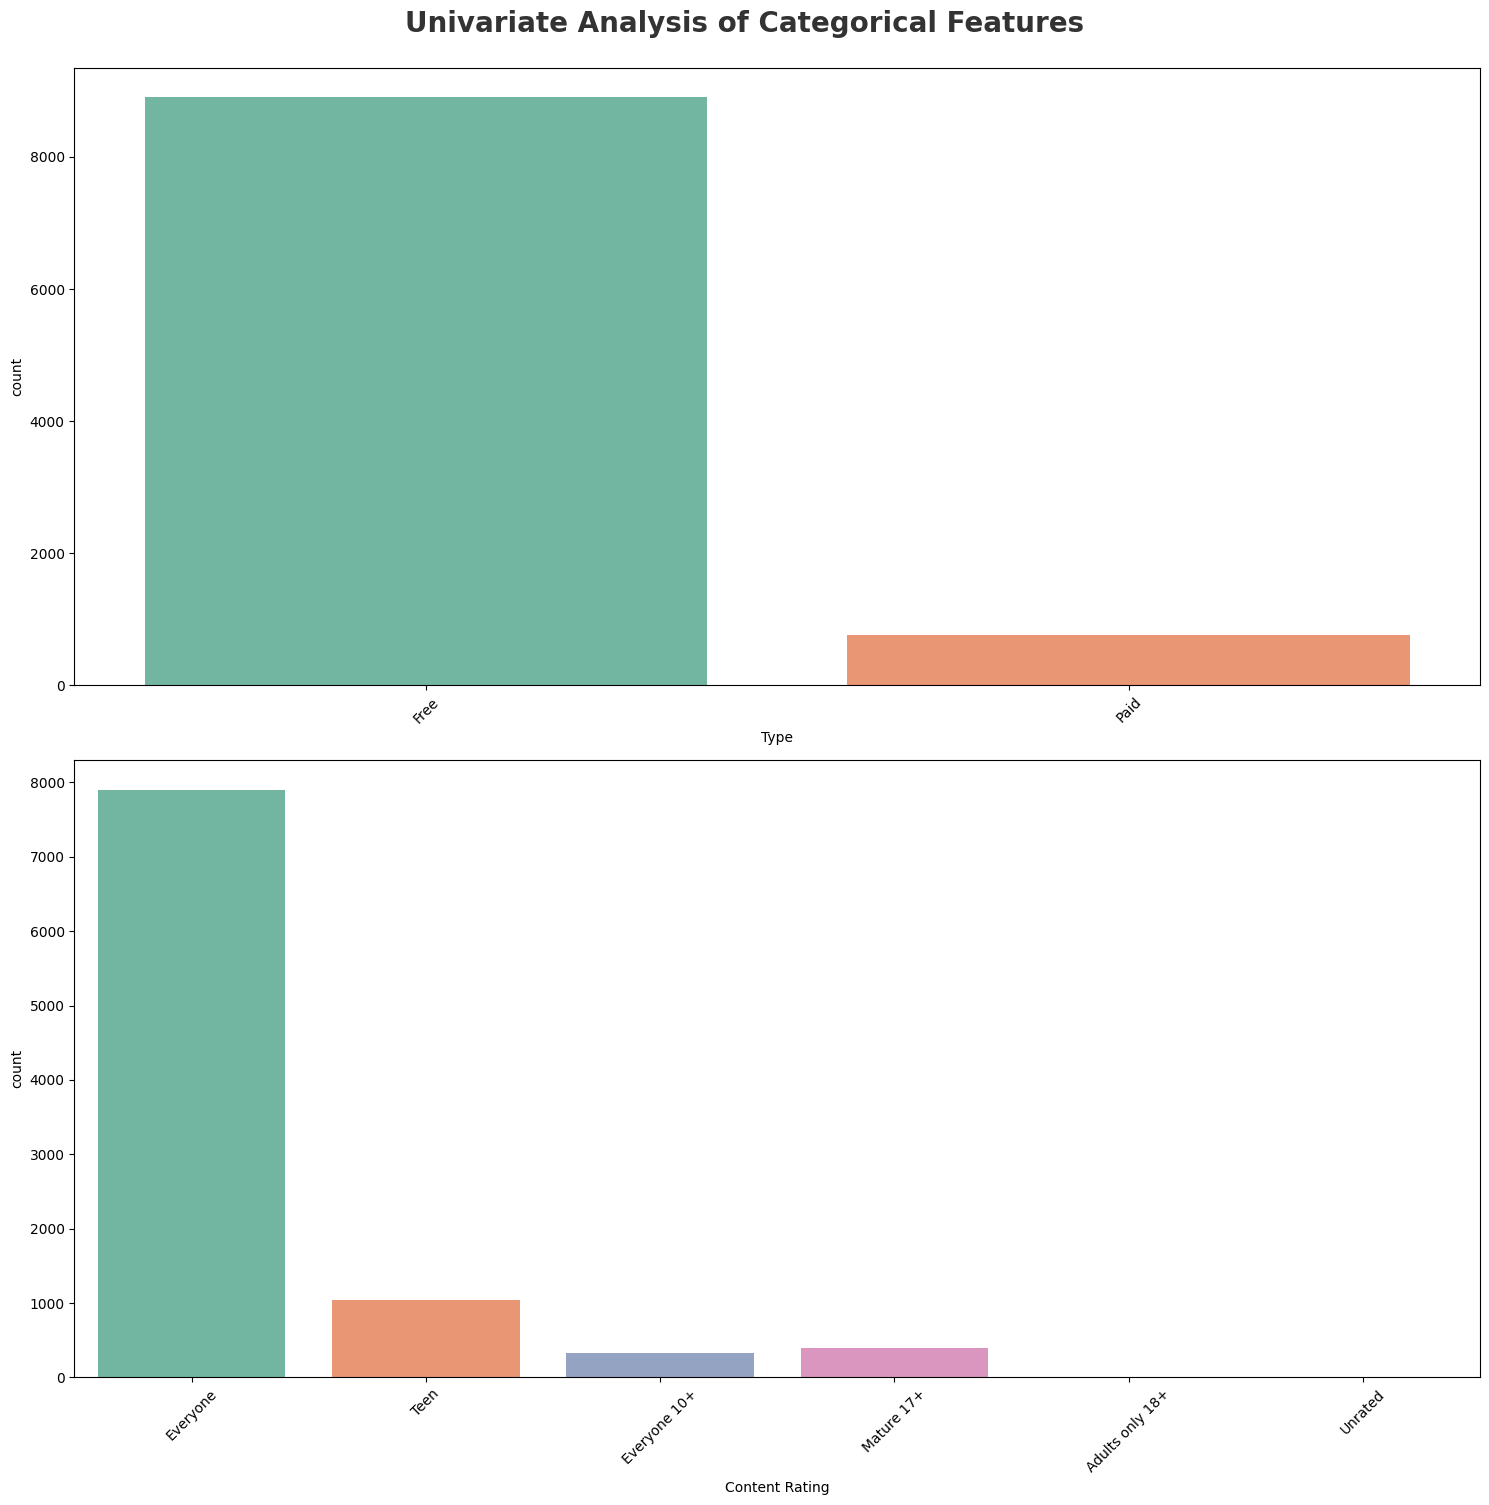

In [39]:
# Univariate Analysis of Categorical Features
# This cell creates a figure with count plots for the 'Type' and 'Content Rating' categories

plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontweight = 'bold',  fontsize = 20 , alpha = 0.8 , y= 1)
categories = ['Type', 'Content Rating']

for i in range(0, len(categories)): 
    plt.subplot(2,1,i+1)
    sns.countplot(x = df1[categories[i]], palette="Set2")
    plt.xlabel(categories[i])
    plt.xticks(rotation= 45)
    plt.tight_layout()

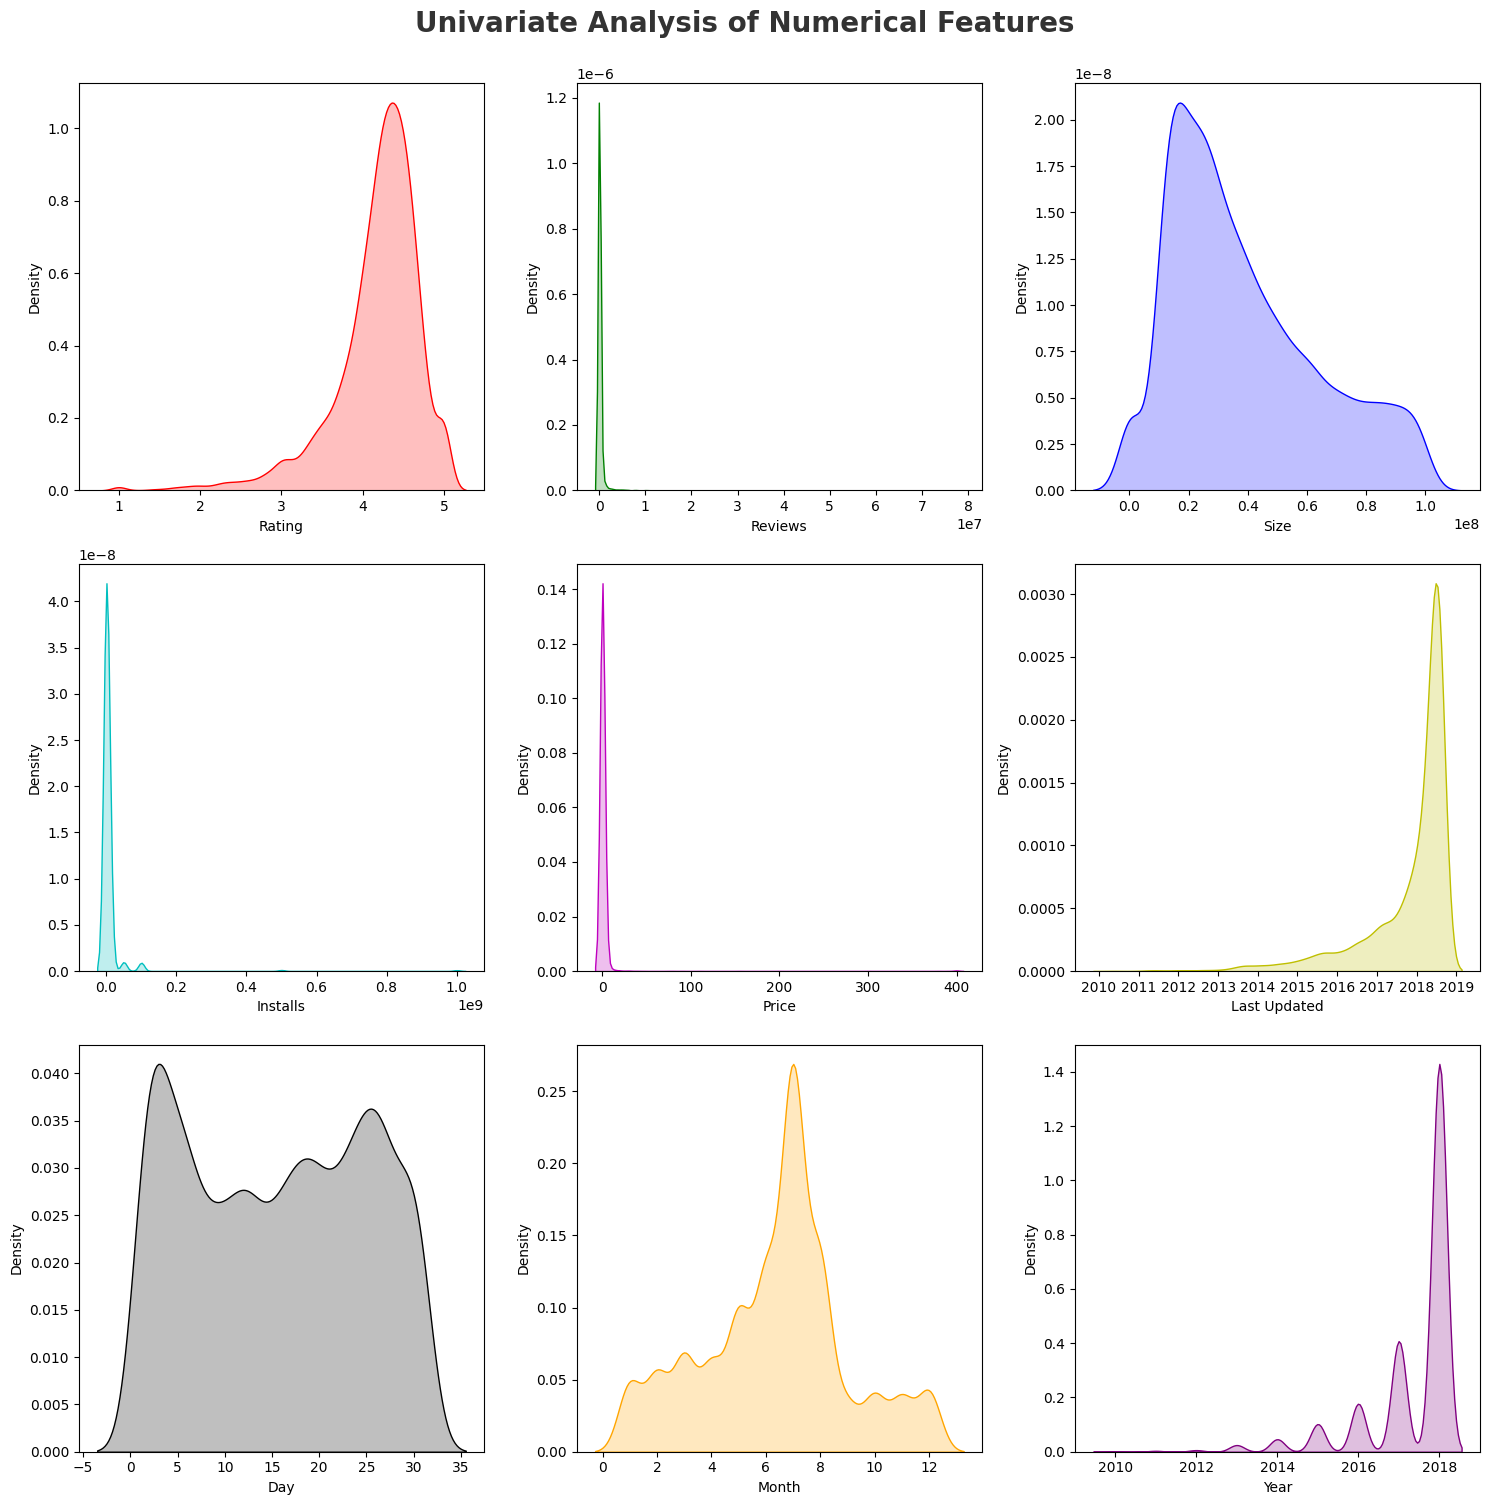

In [40]:
# Univariate Analysis of Numerical Features
# This cell creates a figure with KDE plots for all numeric features
# KDE plots show the distribution of each numeric variable

plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontweight = 'bold',  fontsize = 20 , alpha = 0.8 , y= 1)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple']

for i in range(0, len(numeric_features)): 
    plt.subplot(3,3,i+1)
    sns.kdeplot(x = df1[numeric_features[i]],shade = True , color = colors[i % len(colors)])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


#### Observations from the KDE plots:

 1. Rating: The distribution is left-skewed, with most apps having ratings between 4 and 5.
 2. Reviews: Highly right-skewed distribution, indicating that most apps have a low number of reviews, while a few apps have a very high number.
 3. Size: Right-skewed distribution, suggesting that most apps are relatively small in size, with fewer large-sized apps.
 4. Installs: Extremely right-skewed, implying that a small number of apps have a very high number of installs, while most have fewer.
 5. Price: Highly right-skewed, showing that most apps are free or low-priced, with very few high-priced apps.
 6. Day: Relatively uniform distribution across the month, with slight variations.
 7. Month: Some months show higher frequencies than others, possibly indicating seasonal trends in app updates or releases.
 8. Year: The distribution is concentrated in recent years, suggesting the dataset primarily contains newer apps or recent updates.

 These distributions provide insights into the characteristics of apps in the Google Play Store, highlighting trends in ratings, popularity, pricing, and update patterns.


In [41]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

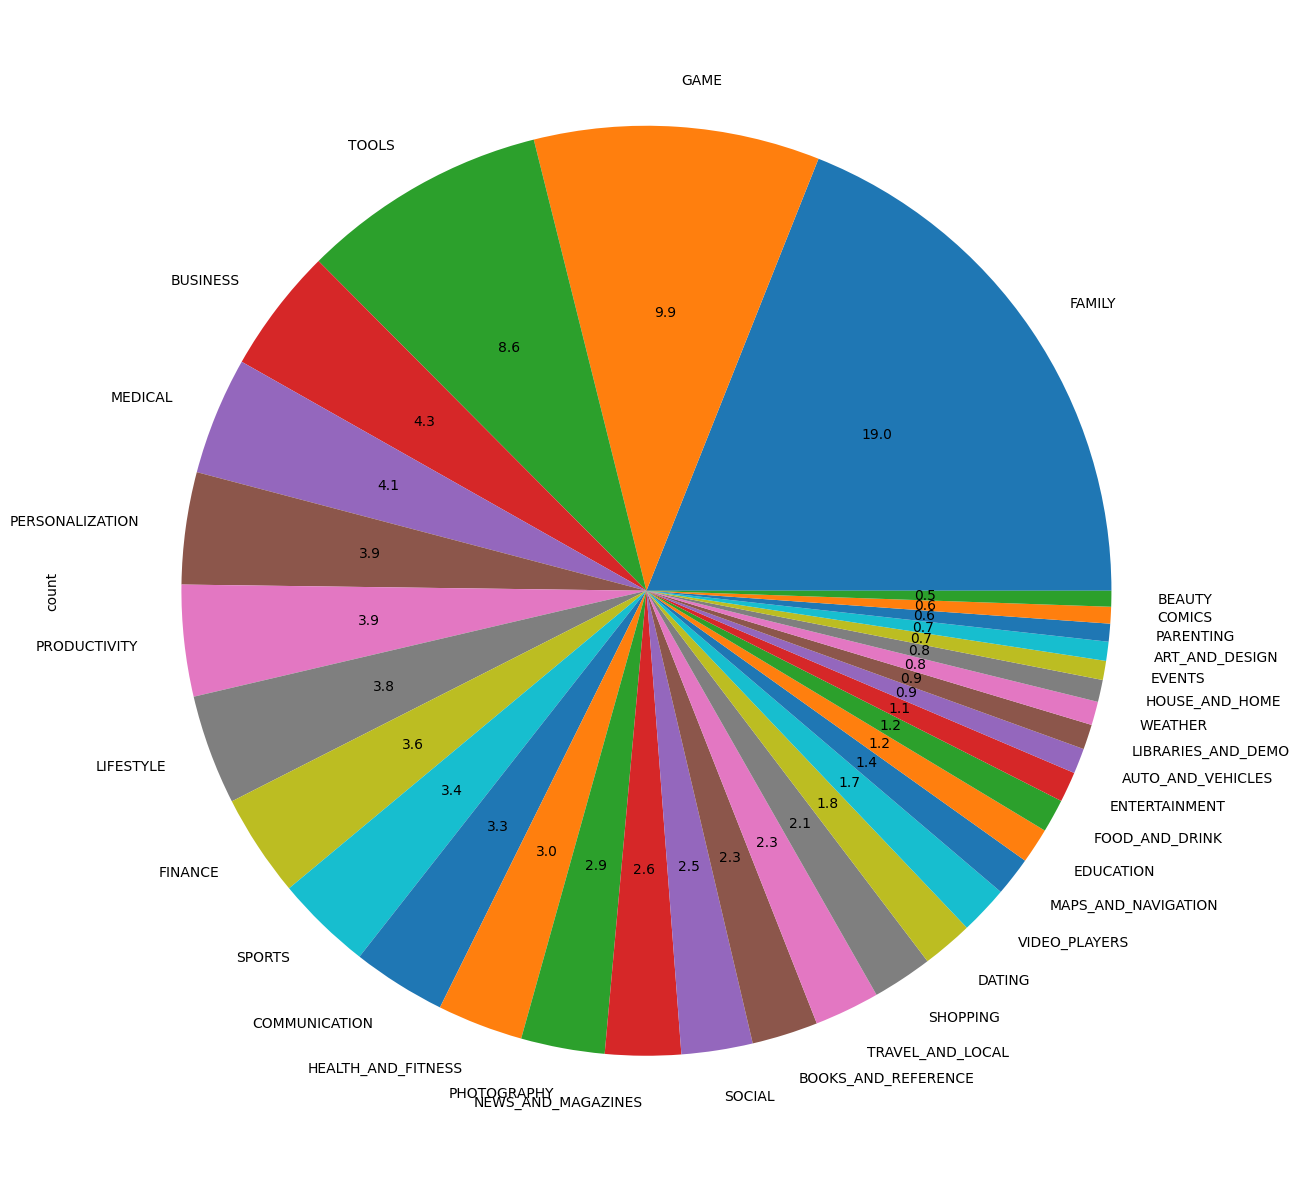

In [46]:
# Most popular category
df1['Category'].value_counts().plot.pie(figsize = (15,16),autopct ='%1.1f')

#### Observations from the Category Distribution Pie Chart:
 
 1. The Google Play Store has a diverse range of app categories.
 2. Some categories are significantly more popular than others in terms of the number of apps.
 3. The top categories (those with larger slices) likely include:
    - Family
    - Games
    - Tools
    - Business
    - Lifestyle
 4. There's a long tail of smaller categories, each representing a small percentage of the total apps.
 5. This distribution suggests that app developers tend to focus on certain popular categories, 
    possibly due to higher user demand or easier monetization in these areas.
 6. The diversity of categories indicates that the Play Store caters to a wide range of user needs and interests.
 7. Some very small slices are difficult to read, indicating niche categories with fewer apps.
 8. This distribution could be useful for app developers in identifying potentially saturated markets 
    or opportunities in underserved categories.
 
 Further analysis could involve examining the relationship between category popularity and other factors 
 like average rating, number of installs, or revenue generation.



In [83]:
# Top 10 app category
category = pd.DataFrame(df1['Category'].value_counts())

In [84]:
category.reset_index(inplace=True )

,Category,count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


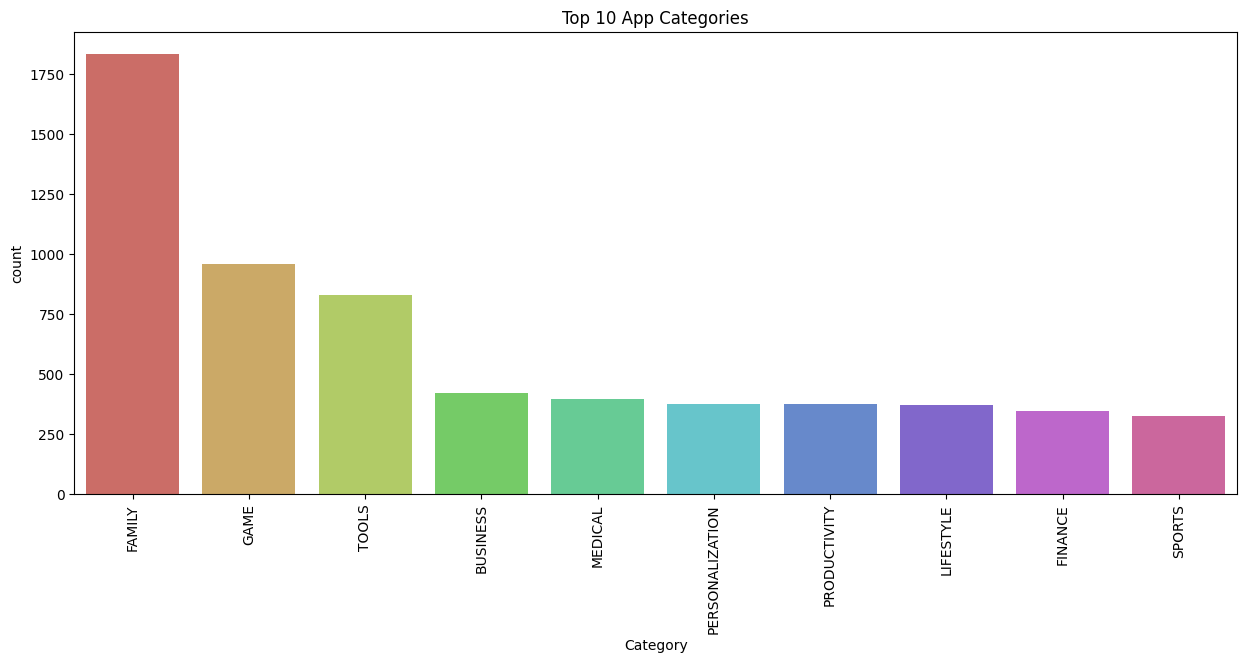

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(x = category.Category[:10], y ='count', data=category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

 1. Family apps dominate the Play Store, with nearly twice as many apps as the next category (Games).
 2. The top 3 categories (Family, Game, Tools) account for a significant portion of all apps, indicating user preference and market focus in these areas.


In [119]:
# Category with largest number of installations
install_cat = pd.DataFrame(df1.groupby('Category')['Installs'].sum())

In [120]:
install_cat.reset_index(inplace=True)

In [121]:
install_cat = install_cat.sort_values(['Installs'], ascending=False)

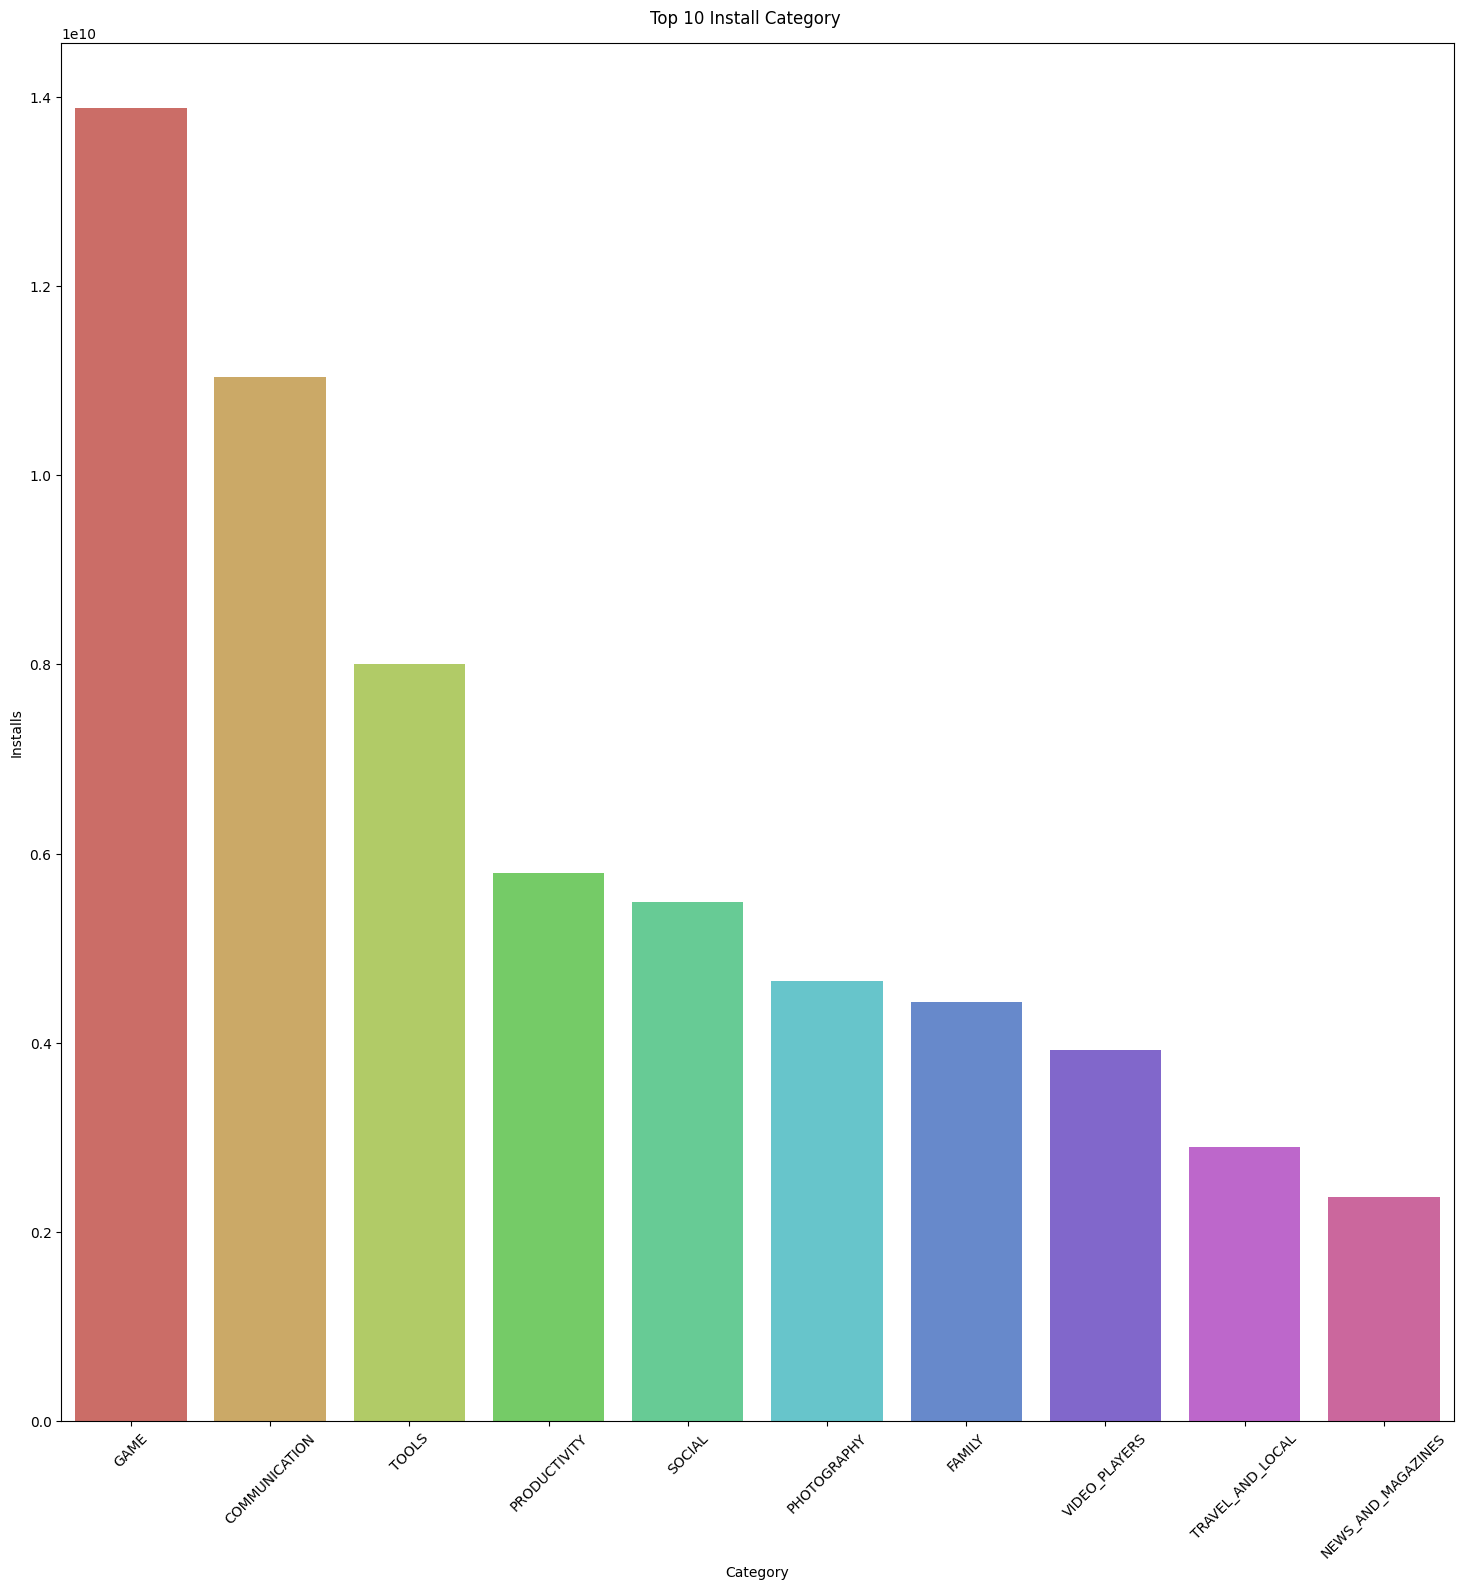

In [125]:
plt.figure(figsize=(15,15))
plt.suptitle('Top 10 Install Category')

sns.barplot(x =install_cat.Category[:10], y= 'Installs', data=install_cat[:10], palette='hls')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()


 1. Game apps dominate in terms of total installations, significantly outpacing other categories.
 2. Communication and Tools categories are the next most installed, suggesting high user demand for utility-focused apps.


In [126]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [134]:
app_catg = df1.groupby(['Category', 'App'])['Installs'].sum().reset_index()

In [136]:
app_catg = app_catg.sort_values('Installs', ascending=False)
app_catg


,Category,App,Installs
9311,TRAVEL_AND_LOCAL,Google Street View,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
9566,VIDEO_PLAYERS,YouTube,1000000000
1181,COMMUNICATION,WhatsApp Messenger,1000000000
...,...,...,...
9275,TRAVEL_AND_LOCAL,EG | Explore Folegandros,0
6020,MEDICAL,EP Cook Book,0
3662,FINANCE,Eu sou Rico,0
1797,FAMILY,Ain Arabic Kids Alif Ba ta,0


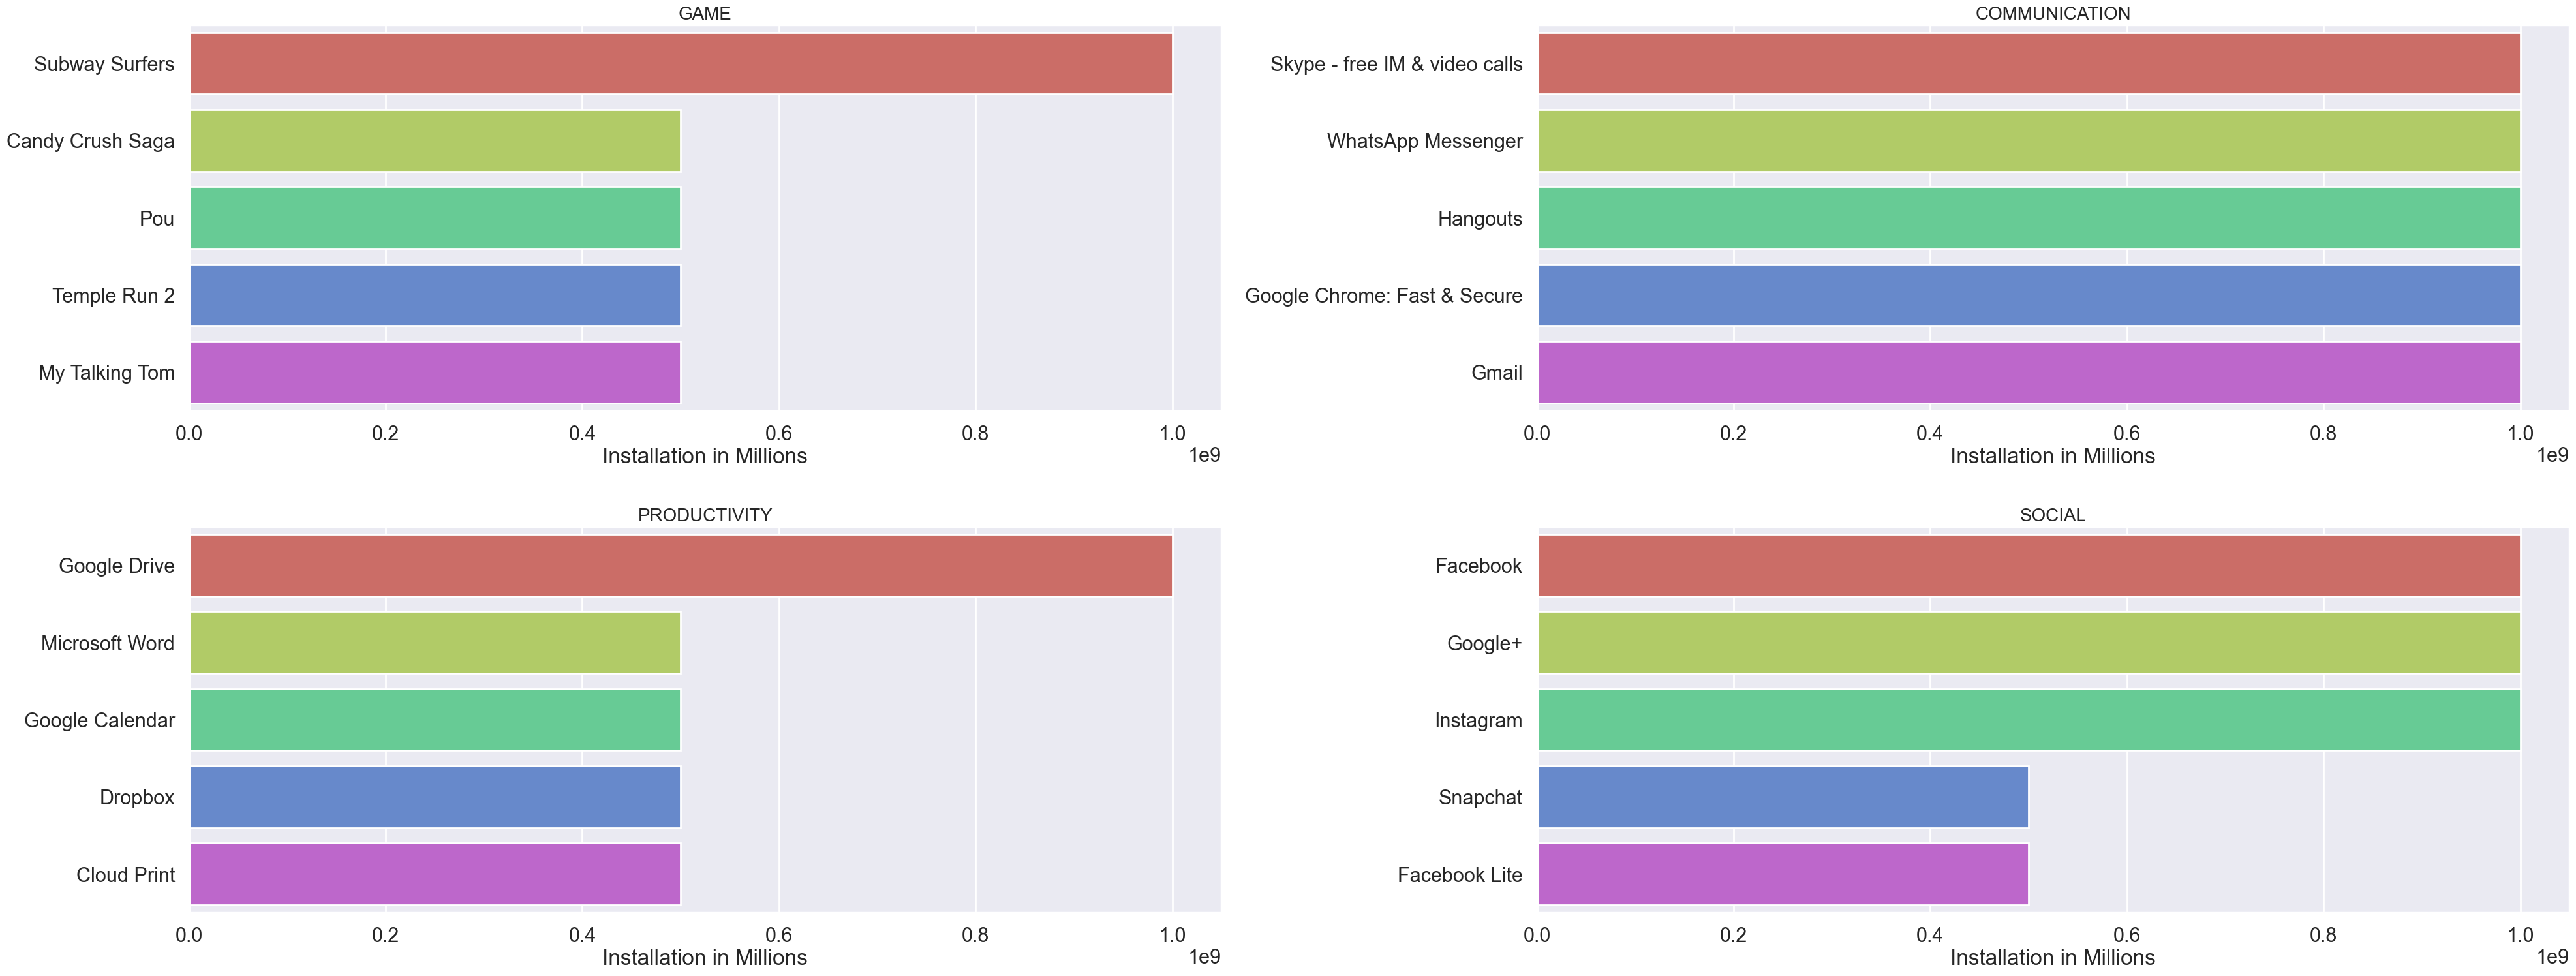

In [141]:
dfa = df1.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App', palette='hls' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

Insights from the chart:

1. Game category:
   - Subway Surfers is the most installed game app, followed by Candy Crush Saga.
   - The top 5 game apps all have very high installation numbers, indicating the popularity of mobile gaming.

2. Communication category:
   - WhatsApp Messenger dominates this category with the highest number of installations.
   - Facebook Messenger and Skype are also among the top communication apps.
   - This shows the importance of messaging and social communication apps to users.

3. Productivity category:
   - Google Drive leads in installations, highlighting the need for cloud storage and file sharing.
   - Other top productivity apps include Microsoft Word and Samsung Notes, indicating a mix of work and personal productivity tools.

4. Social category:
   - Facebook is by far the most installed social app, demonstrating its dominance in social media.
   - Instagram and Snapchat follow, showing the popularity of image and video-based social platforms.

Overall observations:
- There's a clear dominance of well-known, established apps across all categories.
- Free, utility-focused apps (communication, productivity) are highly popular alongside entertainment apps (games, social media).
- Google and Facebook own multiple top apps across different categories, showing their strong market presence.



In [149]:
# Apps with 5 ratings count
count = df1[df1['Rating'] == 5]['Rating'].count()
print(f'There are {count} apps with 5 ratings')

There are 271 apps with 5 ratings
